<a href="https://colab.research.google.com/github/gsgol/Data_analysis/blob/main/lab1/Golovanov_Marevichev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from sklearn.decomposition import FastICA

In [2]:
# Прочитаем данные из файла
df = pd.read_excel("24MAG_HW_1_v15.xls", header=None)

In [3]:
df

,0,1,2,3,4,5
0,35.0,2.0,29400.0,6.0,29000.0,289000.0
1,32.0,2.0,NaN,5.0,36000.0,365000.0
2,32.0,1.0,27000.0,5.0,26000.0,261000.0
3,19.0,2.0,8000.0,12.0,50000.0,200000.0
4,36.0,2.0,29000.0,7.0,28000.0,287000.0
5,45.0,3.0,38600.0,12.0,40000.0,397000.0
6,31.0,1.0,18200.0,5.0,16000.0,170000.0
7,41.0,2.0,26100.0,10.0,27000.0,264000.0
8,31.0,1.0,16200.0,NaN,14000.0,148000.0
9,27.0,0.0,20200.0,2.0,17000.0,185000.0


In [4]:
# Переименуем колонки в более информативные
df_renamed = df.rename({0: 'Age', 1: 'numOfDependents', 2: 'income', 3: 'timeSpentInRegion', 4:"carPrice", 5:"loanSize"}, axis='columns')

In [5]:
# Посмотрим на основные значения
df_renamed.describe()

,Age,numOfDependents,income,timeSpentInRegion,carPrice,loanSize
count,40.000000,39.000000,40.000000,40.000000,40.000000,40.000000
mean,39.125000,2.000000,18852.500000,10.050000,21000.000000,205025.000000
std,9.143269,1.100239,9878.751803,4.701064,11756.067719,98230.364385
min,19.000000,0.000000,700.000000,1.000000,0.000000,3000.000000
25%,31.750000,1.000000,12400.000000,5.750000,14750.000000,156750.000000
50%,39.500000,2.000000,18450.000000,10.000000,20000.000000,208000.000000
75%,44.250000,3.000000,26400.000000,13.000000,27250.000000,269000.000000
max,56.000000,4.000000,38600.000000,20.000000,50000.000000,397000.000000


[]

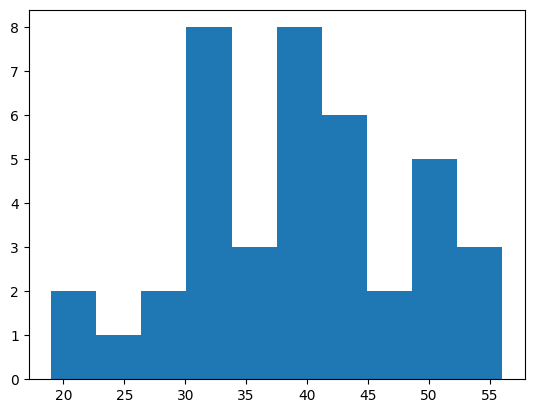

In [6]:
plt.hist(df_renamed["Age"])
plt.plot()

[]

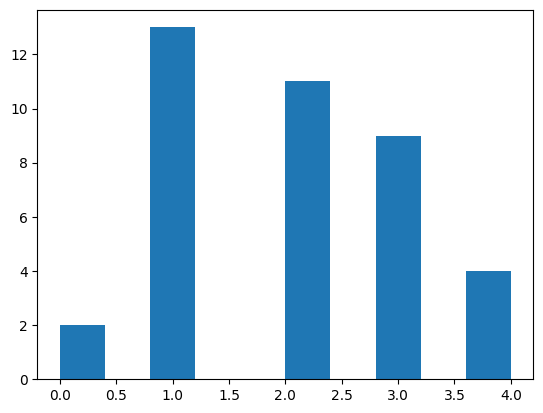

In [7]:
plt.hist(df_renamed["numOfDependents"])
plt.plot()

[]

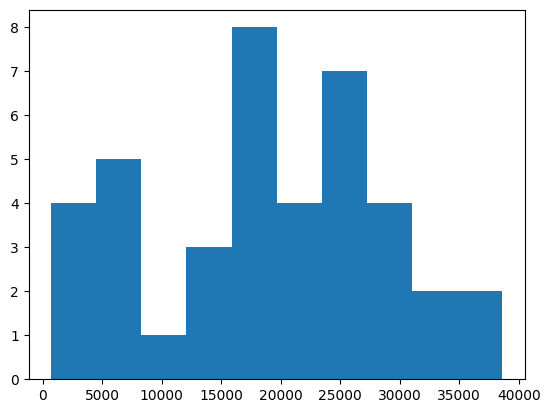

In [8]:
plt.hist(df_renamed["income"])
plt.plot()

[]

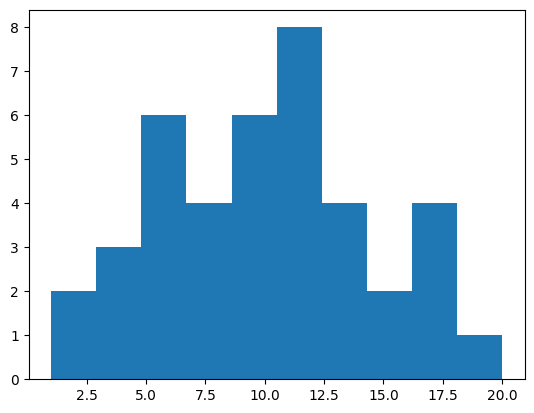

In [9]:
plt.hist(df_renamed["timeSpentInRegion"])
plt.plot()

[]

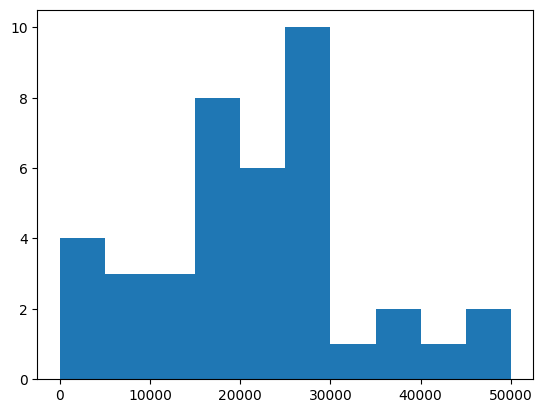

In [10]:
plt.hist(df_renamed["carPrice"])
plt.plot()

Исходя из графиков, распределения признаков похоже на распределения Стьюдента и нормальное распределение

In [11]:
# Заполним пропуски медианным значением
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df_renamed = pd.DataFrame(data=imp.fit_transform(df_renamed), columns = df_renamed.columns)

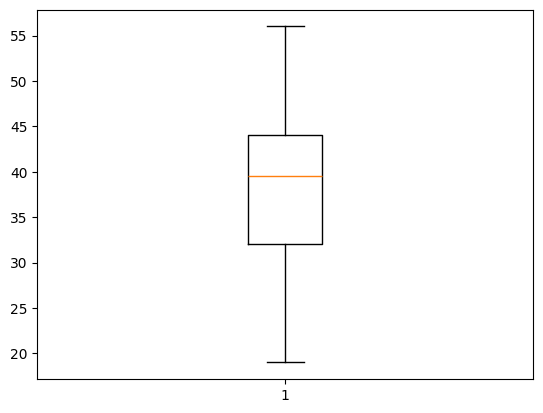

In [12]:
plt.boxplot(df_renamed["Age"])
plt.show()

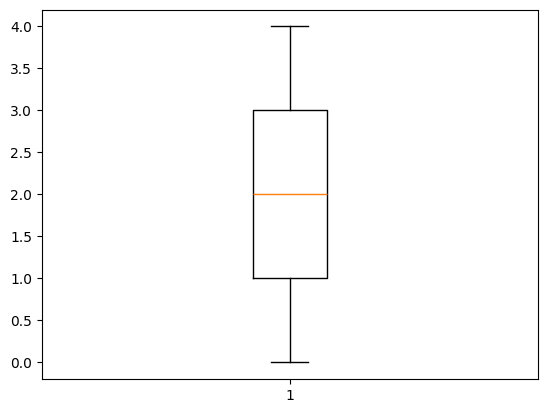

In [13]:
plt.boxplot(df_renamed["numOfDependents"])
plt.show()

[]

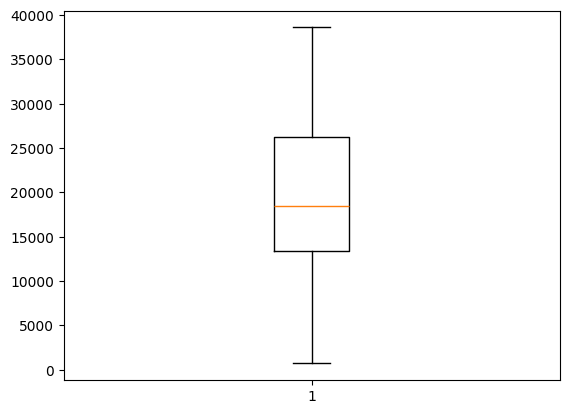

In [14]:
plt.boxplot(df_renamed["income"])
plt.plot()

[]

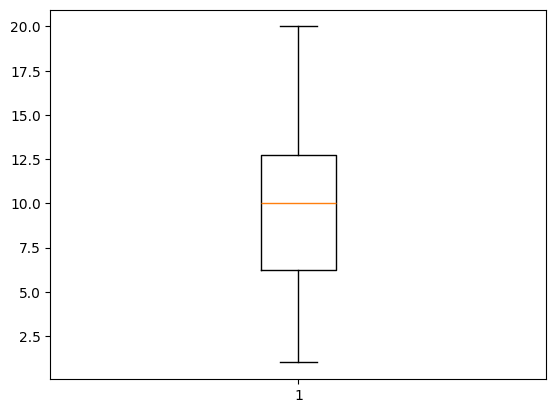

In [15]:
plt.boxplot(df_renamed["timeSpentInRegion"])
plt.plot()

[]

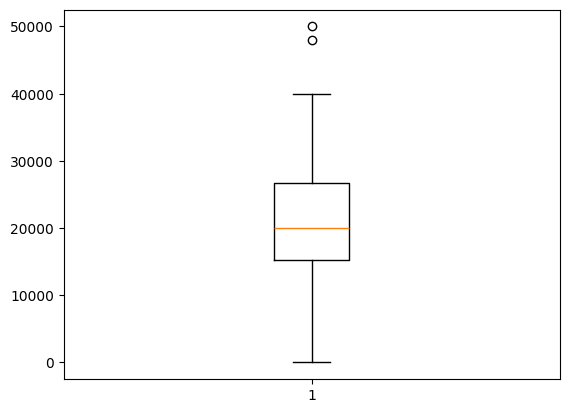

In [16]:
plt.boxplot(df_renamed["carPrice"])
plt.plot()

Исходя из данных графиков можно заметить, что данные распределены довольно кучно, но в некоторых признаках встречаются выбросы

In [17]:
# 4. Выполнить центрирование данных и такую нормировку, что евклидова
# норма каждого признака равна 1 (полученная матрица обозначается через Z).
import sklearn.preprocessing
from scipy import sparse
from sklearn.utils.extmath import row_norms
from sklearn.utils import check_array

df_Z = df_renamed

# Нормировка данных.
arr_Z = sklearn.preprocessing.normalize(
    df_Z,
    norm='l2', # Euclidean norm
    axis=0) # normalize each feature, not sample

# Проверка норм признаков (должна равняться одному).
for i in range(len(df_Z.columns)):
    print(round(np.linalg.norm(arr_Z[:,i], ord=2), 2), end=' ')

1.0 1.0 1.0 1.0 1.0 1.0 

(42, 6) (6,) (6, 6)
Получили матрицы U, S и V, напр. S:
[2.3125505  0.68968287 0.34108599 0.19860168 0.10636714 0.09670313]


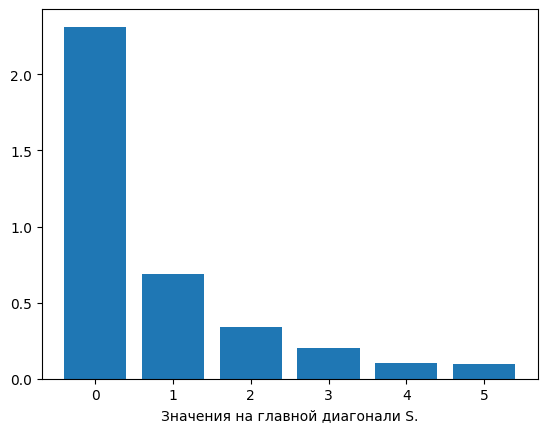

In [18]:
# 5. Найти SVD разложение матрицы Z (матрицы U, S, V).

arr_U, arr_S, arr_V = np.linalg.svd(arr_Z, full_matrices=False)

print(f'{arr_U.shape} {arr_S.shape} {arr_V.shape}')

plt.bar(range(len(arr_S)), arr_S)
plt.xlabel('Значения на главной диагонали S.')
plt.plot()
print(f'Получили матрицы U, S и V, напр. S:\n{arr_S}')

In [19]:
# 6. Исследуйте, сколько скрытых факторов (главные факторы) достаточно для
# хорошей аппроксимации матрицы данных Z.

arr_S_variance = arr_S ** 2 / np.sum(arr_S ** 2)
print('Колво признаков против процента совпадений:')
for i in range(1, len(arr_S_variance) + 1):
    percent = np.sum(arr_S_variance[:i]) * 100
    print(f'\t{i} -- {percent:.2f}%')

print()
print(
    'Итог: можно обойтись тремя первыми признаками ' +
    f'({(np.sum(arr_S_variance[:3]) * 100):.2f}%)')

Колво признаков против процента совпадений:
	1 -- 89.13%
	2 -- 97.06%
	3 -- 99.00%
	4 -- 99.66%
	5 -- 99.84%
	6 -- 100.00%

Итог: можно обойтись тремя первыми признаками (99.00%)


In [20]:
# 7. Замените значения исходных признаков линейными комбинациями главных факторов
# (матрица Z_k, k -- число главных факторов). Вычислите погрешность аппроксимации
# в операторной матричной норме и норме Фробениуса.

# Z_k (42x6) = U (42x6) @ S (6xk) @ V (kx6)
k = 3
arr_Z_3 = arr_U @ np.diag(arr_S)[:, :k] @ arr_V[:k, :]

print(f'Матрица Z:\n{np.around(arr_Z[:3,:], 2)}')
print()
print(f'Матрица Z_3:\n{np.around(arr_Z_3[:3,:], 2)}')

arr_Z_diff = arr_Z - arr_Z_3

err_norm_F = np.linalg.norm(arr_Z_diff, ord='fro')
err_norm_2 = np.linalg.norm(arr_Z_diff, ord=2)

rel_err_norm_F = err_norm_F / (np.linalg.norm(arr_Z, ord='fro') ** 2)
rel_err_norm_2 = err_norm_2 / (np.linalg.norm(arr_Z, ord=2) ** 2)

print()
print('Норма Фробениуса -- ', end='')
print(f'{err_norm_F:.3f}')

print('Евклидова норма -- ', end='')
print(f'{err_norm_2:.3f}')

print('Погрешность в норме Фробениуса -- ', end='')
print(f'{rel_err_norm_F * 100:.2f}%')

print('Погрешность в операторной матричной норме -- ', end='')
print(f'{rel_err_norm_2 * 100:.2f}%')

Матрица Z:
[[0.13 0.14 0.21 0.08 0.19 0.2 ]
 [0.12 0.14 0.13 0.07 0.23 0.25]
 [0.12 0.07 0.2  0.07 0.17 0.18]]

Матрица Z_3:
[[0.14 0.12 0.21 0.1  0.19 0.2 ]
 [0.1  0.14 0.17 0.09 0.24 0.2 ]
 [0.12 0.08 0.2  0.06 0.16 0.18]]

Норма Фробениуса -- 0.245
Евклидова норма -- 0.199
Погрешность в норме Фробениуса -- 4.09%
Погрешность в операторной матричной норме -- 3.71%


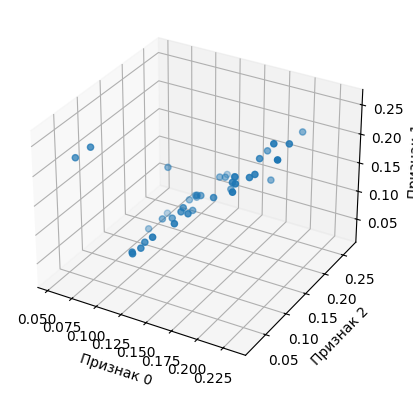

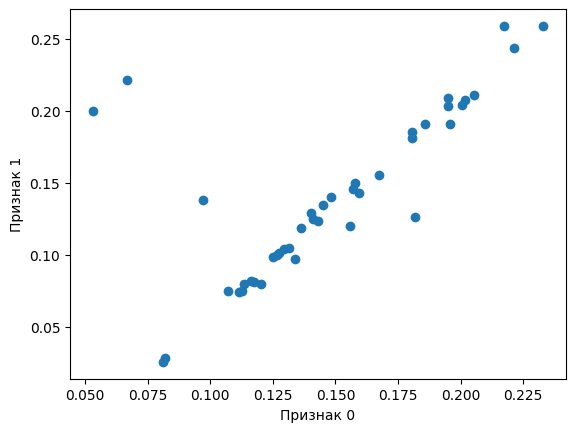

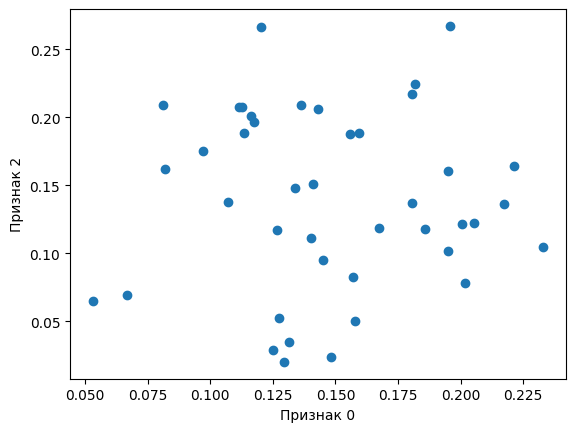

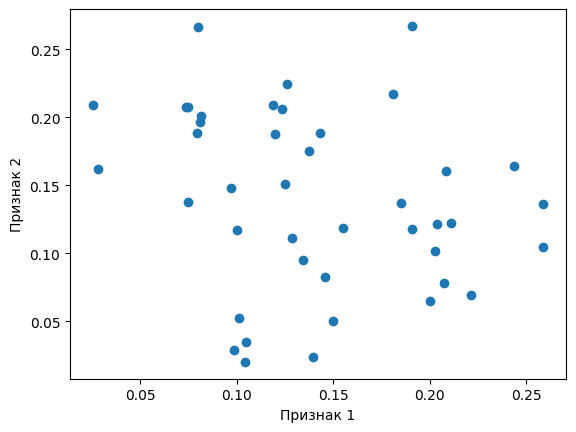

Можно явно заметить, что чем больше признак 0, тем больше признак 2. Связь остальных признаков просто так по карте разглядеть сложнее. Признак 0 -- возраст (Age), признак 1 -- количество иждевенцев(numOfDependents),т.е. чем старше человек, тем больше у него иждевенцев -- логично. То же самое можно сказать и про корреляцию возраста (Age, признак 0) изаработка (income, признак 2)


In [21]:
# 8. Используя выделенные главные факторы, найти представления клиентов векторами
# меньшей размерности (размерности k) и построить карту клиентов. Сделать выводы
# о клиентах банка.

arr_Z_3_fin = arr_Z_3[:, :3]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(arr_Z_3_fin[:, 0], arr_Z_3_fin[:, 2], arr_Z_3_fin[:, 1])
ax.set_xlabel('Признак 0')
ax.set_zlabel('Признак 1')
ax.set_ylabel('Признак 2')

plt.show()

plt.scatter(arr_Z_3_fin[:, 0], arr_Z_3_fin[:, 1])
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.show()

plt.scatter(arr_Z_3_fin[:, 0], arr_Z_3_fin[:, 2])
plt.xlabel('Признак 0')
plt.ylabel('Признак 2')
plt.show()

plt.scatter(arr_Z_3_fin[:, 1], arr_Z_3_fin[:, 2])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

print(
    'Можно явно заметить, что чем больше признак 0, тем больше признак 2. '
    'Связь остальных признаков просто так по карте разглядеть сложнее. '
    'Признак 0 -- возраст (Age), признак 1 -- количество иждевенцев(numOfDependents),'
    'т.е. чем старше человек, тем больше у него иждевенцев -- логично. '
    'То же самое можно сказать и про корреляцию возраста (Age, признак 0) и'
    'заработка (income, признак 2)')


In [22]:
# Уберем тех клиентов у которых значение Z-отклонения меньше 1.5
z_dev = np.abs(stats.zscore(df_renamed))

df_final = df_renamed[(z_dev < 1.5).all(axis=1)]

In [23]:
# Посчитаем манхэттенское расстояние между клиентами
dist_manhattan = manhattan_distances(df_final)

In [24]:
# Понизим размерность пространства до 2-х при помощи ICA(Independent Computing Architecture)
ica2D = FastICA(n_components=2)
df_after_ica = ica2D.fit_transform(dist_manhattan)

In [25]:
# Проверим сохранилось ли расстояние
(manhattan_distances(df_after_ica) == dist_manhattan).all()

np.False_

Расстояние после понижения размерности не сохранилось


In [26]:
# Используем MDS для снижения размерности
mds = MDS(dissimilarity='precomputed', n_components=2)

df_reduced = mds.fit_transform(dist_manhattan)

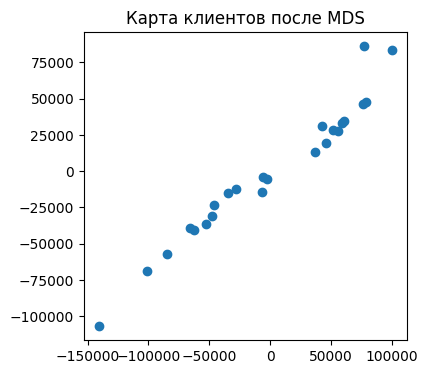

In [27]:
# Построим карту распределения клиентов
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(122)
plt.scatter(df_reduced[:,0], df_reduced[:,1])
plt.title('Карта клиентов после MDS')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()